In [2]:
import zipfile
import os
import numpy as np

zip_path = 'Sec001_Freiwald_Tsao_faceviews_AM_data_csv.zip'
extract_path = 'freiwald_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


Files extracted to: freiwald_data
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site070.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_lupo_am_site181.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site138.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site110.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site105.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site313.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_lupo_am_site157.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_bert_am_site065.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_lupo_am_site221.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_lupo_am_site209.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_lupo_am_site223.csv
freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv/raster_data_be

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

base_path = 'freiwald_data/Freiwald_Tsao_faceviews_AM_data_csv'
data1 = pd.read_csv(f'{base_path}/raster_data_bert_am_site013.csv', header=0)
data2 = pd.read_csv(f'{base_path}/raster_data_bert_am_site014.csv', header=0)
data3 = pd.read_csv(f'{base_path}/raster_data_lupo_am_site225.csv', header=0)

data1 = data1.apply(pd.to_numeric, errors='coerce')
data2 = data2.apply(pd.to_numeric, errors='coerce')
data3 = data3.apply(pd.to_numeric, errors='coerce')

In [15]:
data1 = data1.iloc[:, :400]
data2 = data2.iloc[:, :400]
data3 = data3.iloc[:, :400]


min_trials = min(len(data1), len(data2), len(data3))
data1 = data1.iloc[:min_trials]
data2 = data2.iloc[:min_trials]
data3 = data3.iloc[:min_trials]

X = np.hstack([data1.values, data2.values, data3.values])
print("Shape of feature matrix X:", X.shape)

Shape of feature matrix X: (684, 1200)


In [16]:
n = min_trials // 3
remainder = min_trials % 3
y = np.array([0]*n + [1]*n + [2]*(n + remainder))
print("Shape of labels y:", y.shape)

Shape of labels y: (684,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        43

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



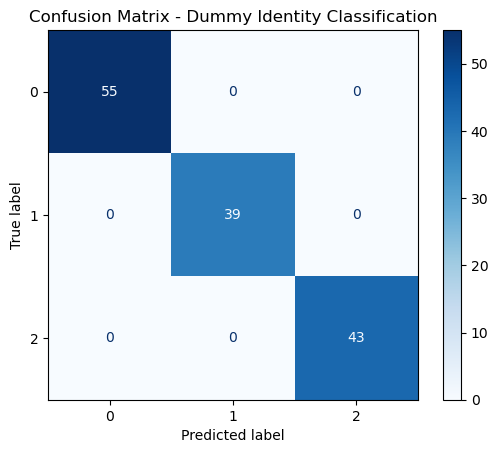

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Dummy Identity Classification")
plt.show()

In [22]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=cv)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

Cross-validation scores: [1.         0.99270073 0.98540146 1.         0.98529412]
Mean cross-validation accuracy: 0.9926792614856161
